In [5]:
from distutils.core import setup
from classes.downloader import Downloader
from classes.tracks import Track
from scripts.dataset_creator import DatasetCreator
import os
import pandas as pd
from scripts import setup
import numpy as np


d = Downloader(setup.get_spotify_username())
   
sonne = Track(d.fetch_single_track_by_name('sonne'))
sonne.load_additional_song_data(d)

related = d.get_related_artists(sonne.artist_id)
#print(d.get_artist_top_tracks(sonne.artist_id))
len(d.get_all_avaliable_genres())

Username swagnacy


126

In [6]:
print(len(sonne.get_dataframe_for_classification().columns))
sonne.get_dataframe_for_classification().columns

32


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'is_long', 'is_short', 'under70s', '70s', '80s', '90s', '00s', '10s',
       '20s', 'rock', 'metal', 'classical', 'progressive', 'pop', 'r&b', 'hop',
       'latin', 'country', 'electr', 'punk', 'dance'],
      dtype='object')

In [15]:
df = pd.read_csv('72k_with_dummies.csv').dropna()
df = df.drop_duplicates(
    subset=['Name', 'Artist'],
    keep = 'last'
).reset_index(drop = True)
df = df.drop(['Unnamed: 0', 'Name', 'Artist', 'Artist_id', 'genres'], axis=1)
#df.to_csv('work.csv', index=False)
print(len(df))
df.columns

63806


Index(['Id', 'Year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

In [16]:
df['duration_ms'].describe()
df['duration_ms'].quantile(0.05)

121844.5

In [17]:
df['is_long'] = df['duration_ms'] > df['duration_ms'].quantile(0.90)
df['is_short'] = df['duration_ms'] < df['duration_ms'].quantile(0.05)

df['under70s'] = df['Year'] < 1970
df['70s'] = (df['Year'] >= 1970) & (df['Year'] < 1980)
df['80s'] = (df['Year'] >= 1980) & (df['Year'] < 1990)
df['90s'] = (df['Year'] >= 1990) & (df['Year'] < 2000)
df['00s'] = (df['Year'] >= 2000) & (df['Year'] < 2010)
df['10s'] = (df['Year'] >= 2010) & (df['Year'] < 2020)
df['20s'] = df['Year'] >= 2020 

sel_genres = ['rock', 'metal', 'classical', 'progressive', 'pop', \
    'r&b', 'hop', 'latin', 'country', 'electr', 'punk', 'dance']
for s in sel_genres:
    df[s] = df['genre'].apply(lambda x: s in str.lower(x))
    print(df[s].value_counts())
df = df.drop(['Year', 'genre', 'duration_ms'], axis=1)
df.to_csv('new_format1.csv', index=False)
df.head(10)


False    52654
True     11152
Name: rock, dtype: int64
False    60973
True      2833
Name: metal, dtype: int64
False    63211
True       595
Name: classical, dtype: int64
False    63251
True       555
Name: progressive, dtype: int64
False    55298
True      8508
Name: pop, dtype: int64
False    62366
True      1440
Name: r&b, dtype: int64
False    60467
True      3339
Name: hop, dtype: int64
False    62185
True      1621
Name: latin, dtype: int64
False    60835
True      2971
Name: country, dtype: int64
False    63291
True       515
Name: electr, dtype: int64
False    63115
True       691
Name: punk, dtype: int64
False    60557
True      3249
Name: dance, dtype: int64


,Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,classical,progressive,pop,r&b,hop,latin,country,electr,punk,dance
0,59CfNbkERJ3NoTXDvoURjj,0.345,0.612,7.0,-6.543,0.0,0.0608,0.232000,0.000000,0.1940,...,False,False,True,False,False,False,False,False,False,False
1,3yII7UwgLF6K5zW3xad3MP,0.642,0.695,7.0,-5.620,1.0,0.0281,0.000443,0.000010,0.0753,...,False,False,True,False,False,False,False,False,False,False
2,62Yo3FDddWY8ydu6PW2wyz,0.647,0.581,4.0,-7.678,0.0,0.0884,0.002900,0.000008,0.1190,...,False,False,False,False,True,False,False,False,False,False
3,1ri9ZUkBJVFUdgwzCnfcYs,0.843,0.700,4.0,-3.563,0.0,0.0803,0.093400,0.000000,0.1400,...,False,False,True,False,False,False,False,False,False,True
4,3KyKxJ4P3pVCgaZwaq2rUC,0.728,0.741,6.0,-7.075,0.0,0.0473,0.000582,0.002060,0.3300,...,False,False,False,True,False,False,False,False,False,False
5,3o9kpgkIcffx0iSwxhuNI2,0.742,0.527,8.0,-6.892,0.0,0.0769,0.327000,0.000000,0.2500,...,False,False,False,False,False,False,False,False,False,False
6,7z3rc7SCgjbAztt1cbXkVj,0.841,0.433,0.0,-7.699,0.0,0.1750,0.034400,0.000002,0.1210,...,False,False,False,False,False,False,False,False,False,False
7,0IuVhCflrQPMGRrOyoY5RW,0.614,0.644,2.0,-5.372,0.0,0.0426,0.013400,0.000007,0.1170,...,False,False,False,False,False,False,False,False,False,False
8,0lEjxUUlKqjqXrVlIHFduD,0.828,0.591,1.0,-6.217,1.0,0.1090,0.019900,0.000323,0.3610,...,False,False,False,False,True,False,False,False,False,False
9,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651000,0.000000,0.0695,...,False,False,True,False,False,False,False,False,False,False


In [15]:
df.columns

Index(['Id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'is_long', 'is_short', 'under70s', '70s', '80s',
       '90s', '00s', '10s', '20s', 'rock', 'metal', 'classical', 'progressive',
       'pop', 'r&b', 'hop', 'latin', 'country', 'electr', 'punk', 'dance'],
      dtype='object')

In [13]:
concatenated = pd.concat([df, pd.get_dummies(df['genre'])], axis=1)
concatenated = concatenated.drop(['genre'], axis=1)
concatenated.to_csv('concat.csv', index=False)
concatenated.columns

Index(['Id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       ...
       'white noise', 'workout product', 'world chill', 'worship', 'wrestling',
       'xitsonga pop', 'yacht rock', 'yoga', 'zenonesque', 'zolo'],
      dtype='object', length=1571)

In [ ]:
for i in range(len(related['artists'])):
    print(related['artists'][i]['name'], related['artists'][i]['id'])

In [ ]:
def get_desired_data(track):
    pp = pd.DataFrame.from_dict(track.audio_features.items()).T
    pp.columns = pp.iloc[0]
    pp = pp.drop(0)
    pp = pp[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                                                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                                                'duration_ms']]
    #p = pd.DataFrame(columns=['Name', 'Id', 'Year', 'Artist', 'Artist_id'])
    pp['Name'] = [track.name]
    pp['Id'] = [track.id]
    pp['Year'] = [track.year]
    pp['Artist'] = [track.artist_name]
    pp['Artist_id'] = [track.artist_id]

    return pp[['Name', 'Id', 'Year', 'Artist', 'Artist_id','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                                                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                                                'duration_ms']]
                                                
                                        

In [ ]:
df = pd.read_csv('datasets/full.csv').dropna()
unique_ids = list(set(df['Artist_id'].tolist()))
tmp_unique = unique_ids[:]

for i, _id in enumerate(unique_ids):
    if i < 170:
        continue
    #get related artists id
    related_ids = [rel['id'] for rel in d.get_related_artists(_id)['artists']]
    #print(related_ids)

    artist = d.get_artist(_id)
    if artist['popularity'] > 45:
        #get top 10 for id
        top = d.get_artist_top_tracks(_id)
        if top['tracks'] is None:
            continue

        for tr in top['tracks']:
            track = Track(tr)
            track.load_additional_song_data(d)

            if track.audio_features is None:
                continue
            
            df = pd.concat([df, get_desired_data(track)])

    #get top 10 for every related artist
    it = 0
    for relid in related_ids:
        if it > 5:
            break
        it+=1
        if relid not in tmp_unique:
            artist = d.get_artist(relid)
            if artist['popularity'] > 45:
                tmp_unique.append(relid)
                top = d.get_artist_top_tracks(relid)
                if top['tracks'] is None:
                    continue

                for tr in top['tracks']:
                    track = Track(tr)
                    track.load_additional_song_data(d)

                    if track.audio_features is None:
                        continue

                    df = pd.concat([df, get_desired_data(track)])
    
    print(f'{i} / {len(unique_ids)-1}')
    df.to_csv('datasets/full.csv', index=False)

df = df.reset_index(drop=True)  
df.to_csv('datasets/full_dataset.csv', index=False)
df.info()


In [ ]:
d = pd.read_csv('datasets/full.csv')
d.info()

In [1]:
from classes.queue_builder import QueueBuilder
qbuilder = QueueBuilder()
qbuilder.pd_data['cluster'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63806 entries, 0 to 63805
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                63806 non-null  object 
 1   danceability      63806 non-null  float64
 2   energy            63806 non-null  float64
 3   key               63806 non-null  float64
 4   loudness          63806 non-null  float64
 5   mode              63806 non-null  float64
 6   speechiness       63806 non-null  float64
 7   acousticness      63806 non-null  float64
 8   instrumentalness  63806 non-null  float64
 9   liveness          63806 non-null  float64
 10  valence           63806 non-null  float64
 11  tempo             63806 non-null  float64
 12  is_long           63806 non-null  bool   
 13  is_short          63806 non-null  bool   
 14  under70s          63806 non-null  bool   
 15  70s               63806 non-null  bool   
 16  80s               63806 non-null  bool  

117    3320
44     2312
236    2305
194    2285
78     2122
       ... 
159       8
276       8
210       7
124       6
295       4
Name: cluster, Length: 300, dtype: int64

In [3]:
qbuilder.pd_data.iloc[:, 0:12].head(5)

,Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,59CfNbkERJ3NoTXDvoURjj,0.345,0.612,7.0,-6.543,0.0,0.0608,0.232000,0.000000,0.1940,0.232,179.773
1,3yII7UwgLF6K5zW3xad3MP,0.642,0.695,7.0,-5.620,1.0,0.0281,0.000443,0.000010,0.0753,0.642,103.984
2,62Yo3FDddWY8ydu6PW2wyz,0.647,0.581,4.0,-7.678,0.0,0.0884,0.002900,0.000008,0.1190,0.113,150.149
3,1ri9ZUkBJVFUdgwzCnfcYs,0.843,0.700,4.0,-3.563,0.0,0.0803,0.093400,0.000000,0.1400,0.899,93.991
4,3KyKxJ4P3pVCgaZwaq2rUC,0.728,0.741,6.0,-7.075,0.0,0.0473,0.000582,0.002060,0.3300,0.310,123.006


<AxesSubplot:xlabel='t1', ylabel='t2'>

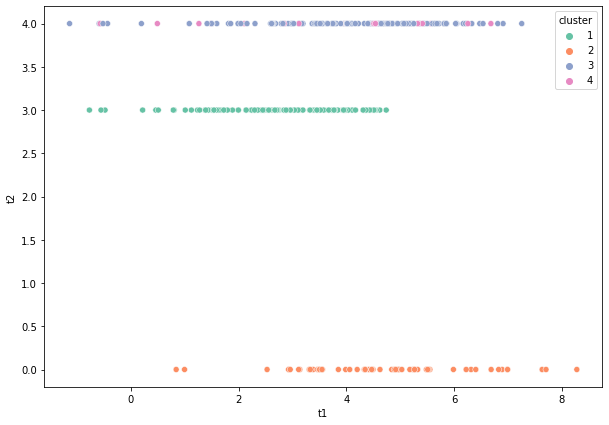

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
dff = qbuilder.pd_data.copy()
fig, ax = plt.subplots(figsize=(10,7))
dff = dff[(dff['cluster'] == 4 ) | (dff['cluster'] == 1 ) |  (dff['cluster'] == 2 ) |  (dff['cluster'] == 3 )]

dff['t1'] = dff['energy']  * dff['valence'] +  dff['loudness'] ** 1/3 +\
     2*dff['is_long'] + 4* dff['is_short'] + dff['under70s'] + dff['mode'] * 5 

dff['t2'] =  3*dff['80s']  + 2*dff['90s'] \
         + 4*dff['00s']  + 5*dff['10s'] + 6*dff['20s']
sns.scatterplot(data=dff, x='t1', y='t2', hue='cluster', palette='Set2', ax = ax)

In [ ]:
qbuilder.pd_data.copy()['cluster'].value_counts()

19    6718
10    5492
12    5396
9     4531
3     4382
0     4279
14    4041
4     3882
26    3137
13    2640
5     1748
23    1647
6     1548
8     1541
16    1361
29    1280
2     1235
27    1200
18    1116
24     993
1      991
25     756
22     737
15     730
20     548
28     539
21     408
11     400
7      345
17     185
Name: cluster, dtype: int64